In [1]:
%matplotlib inline
%load_ext autoreload 
%autoreload 2

from __future__ import division

import numpy as np
import os
#import mne
import pandas as pd
import matplotlib.pyplot as plt

from scipy import io, signal

from data_utils import *
from preprocessing import *

no cv2... continuing...


Using Theano backend.
Using gpu device 0: Tesla K20c (CNMeM is disabled, cuDNN Version is too old. Update to v5, was 3007.)


In [25]:
# Impord data
XX, YY = standard_import(1, downsample=5)

no cv2... continuing...
Converting time column to int64...
165 995 64 
165 995 


In [41]:
# format data
X_, Y_ = XX[0], YY[0]

X_train, _, X_test = X_
Y_train, _, Y_test = Y_

In [62]:
# feature extraction
from scipy import signal

def window_2_freq(x_win):
    sz = np.size(x_win, -1)
    h = signal.hann(sz).reshape(1,-1)
    x = dft(h*x_win)[:,:sz//2] **2
    x = x/x.mean()
    return x.reshape(-1)

X_train_, X_test_ = rec_map(window_2_freq, [X_train, X_test], 2)

In [63]:
from sklearn.linear_model import LogisticRegression as LR

model = LR(n_jobs=-1)

Y_pred = model.fit(X_train_, Y_train).predict(X_test_)

In [64]:
Y_predtr = model.predict(X_train_)

In [65]:
metrics(Y_train, Y_predtr)

accuracy: 0.404128819158
precision: 0.412194435973
recall 0.404128819158


/home/UFAD/yliapis/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/home/UFAD/yliapis/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of

In [66]:
from metrics import *

metrics(Y_test, Y_pred)

accuracy: 0.12161269002
precision: 0.0353847067516
recall 0.12161269002


/home/UFAD/yliapis/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/home/UFAD/yliapis/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of

In [67]:
accuracy_score(Y_test, Y_pred)

0.12161269001982816

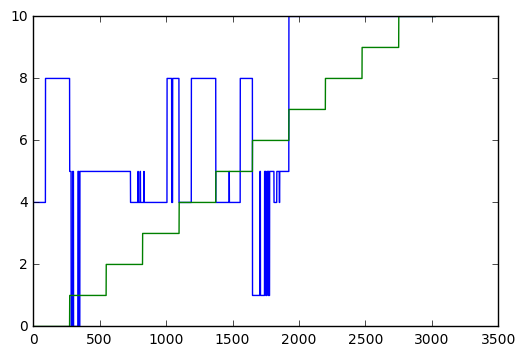

In [68]:
plt.plot(Y_pred)
plt.plot(Y_test)
pl